In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})

In [3]:
df = pd.read_csv("sample_stats.output", sep="\t")
df.head()

,datasets,Nm,scheme,pi
0,100,0.1,1,0.000000
1,100,0.1,1,0.000000
2,100,0.1,1,0.000000
3,100,0.1,1,0.050000
4,100,0.1,1,0.511538


In [4]:
statis = df.groupby(by=["datasets", "Nm", "scheme"]).agg(['mean', 'count', 'std'])
statis

pi                 
                           mean  count       std
datasets Nm    scheme                           
100      0.1   1       0.095603    100  0.216603
               2       0.378500    100  0.437695
         10.0  1       0.194218    100  0.280167
               2       0.195897    100  0.297870
         100.0 1       0.128282    100  0.186938
               2       0.120756    100  0.178789
10000    0.1   1       0.161871  10000  0.293098
               2       0.387517  10000  0.439387
         10.0  1       0.156856  10000  0.247437
               2       0.159201  10000  0.246406
         100.0 1       0.158336  10000  0.245016
               2       0.162312  10000  0.258927

In [5]:
import math
import scipy.stats as stats

z_crit = stats.norm.ppf(q = 0.95)

ci_low = []
ci_upp = []

for i in statis.index:
    m, c, s = statis.loc[i]
    
    ci_low.append(m - z_crit*s/math.sqrt(c))
    ci_upp.append(m + z_crit*s/math.sqrt(c))

statis.loc[:, ("pi", "CI_low")] = ci_low
statis.loc[:, ("pi", "CI_upp")] = ci_upp

#statis.sort_index(axis=1, inplace=True)
statis

pi                                     
                           mean  count       std    CI_low    CI_upp
datasets Nm    scheme                                               
100      0.1   1       0.095603    100  0.216603  0.059974  0.131231
               2       0.378500    100  0.437695  0.306506  0.450494
         10.0  1       0.194218    100  0.280167  0.148135  0.240301
               2       0.195897    100  0.297870  0.146902  0.244893
         100.0 1       0.128282    100  0.186938  0.097533  0.159031
               2       0.120756    100  0.178789  0.091348  0.150165
10000    0.1   1       0.161871  10000  0.293098  0.157050  0.166692
               2       0.387517  10000  0.439387  0.380290  0.394745
         10.0  1       0.156856  10000  0.247437  0.152786  0.160926
               2       0.159201  10000  0.246406  0.155148  0.163254
         100.0 1       0.158336  10000  0.245016  0.154306  0.162366
               2       0.162312  10000  0.258927  0.158053  0.166571

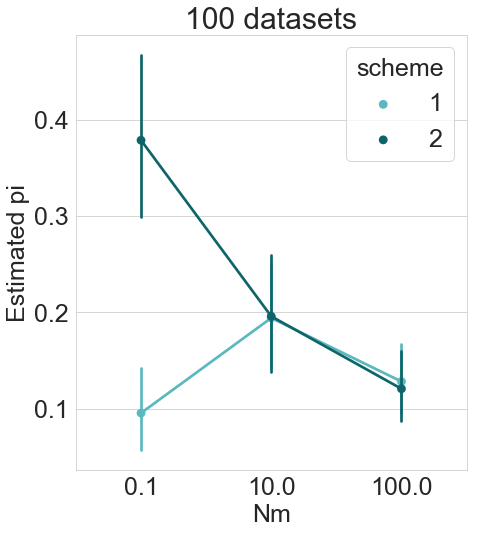

In [6]:
fig, ax = plt.subplots(figsize=(7, 8))
ax = sns.pointplot(x="Nm", y="pi", data=df.loc[df['datasets']==100,:], hue="scheme", 
                   palette=['#5ab8bf', '#0d6569'], 
                   ci=95)
ax.set_title("100 datasets")
ax.set_xlabel("Nm")
ax.set_ylabel("Estimated pi")

#plt.ylim(0,8)
#plt.yticks(np.arange(0,17,8))

#plt.savefig("datasets_1.svg", bbox_inches='tight')

plt.show()

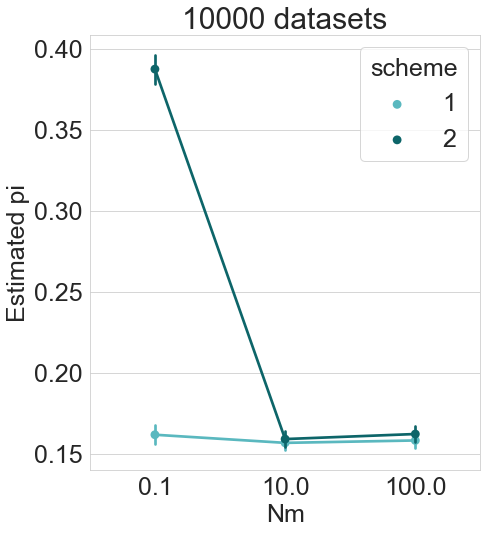

In [7]:
fig, ax = plt.subplots(figsize=(7, 8))
ax = sns.pointplot(x="Nm", y="pi", data=df.loc[df['datasets']==10000,:], hue="scheme", 
                   palette=['#5ab8bf', '#0d6569'], 
                   ci=95)
ax.set_title("10000 datasets")
ax.set_xlabel("Nm")
ax.set_ylabel("Estimated pi")

#plt.ylim(0,8)
#plt.yticks(np.arange(0,17,8))

#plt.savefig("datasets_1.svg", bbox_inches='tight')

plt.show()

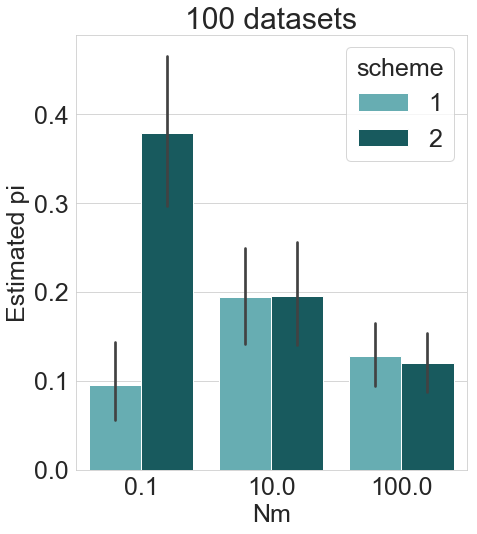

In [8]:
fig, ax = plt.subplots(figsize=(7, 8))
ax = sns.barplot(x="Nm", y="pi", data=df.loc[df['datasets']==100,:], hue="scheme", 
                   palette=['#5ab8bf', '#0d6569'], 
                   ci=95)
ax.set_title("100 datasets")
ax.set_xlabel("Nm")
ax.set_ylabel("Estimated pi")

#plt.ylim(0,8)
#plt.yticks(np.arange(0,17,8))

#plt.savefig("datasets_1.svg", bbox_inches='tight')

plt.show()

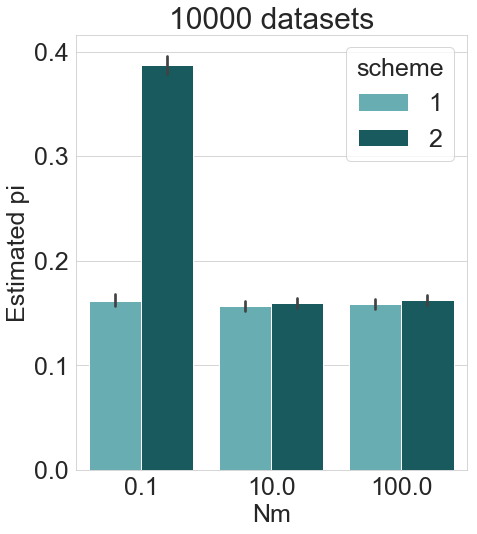

In [9]:
fig, ax = plt.subplots(figsize=(7, 8))
ax = sns.barplot(x="Nm", y="pi", data=df.loc[df['datasets']==10000,:], hue="scheme", 
                   palette=['#5ab8bf', '#0d6569'], 
                   ci=95)
ax.set_title("10000 datasets")
ax.set_xlabel("Nm")
ax.set_ylabel("Estimated pi")

#plt.ylim(0,8)
#plt.yticks(np.arange(0,17,8))

#plt.savefig("datasets_1.svg", bbox_inches='tight')

plt.show()

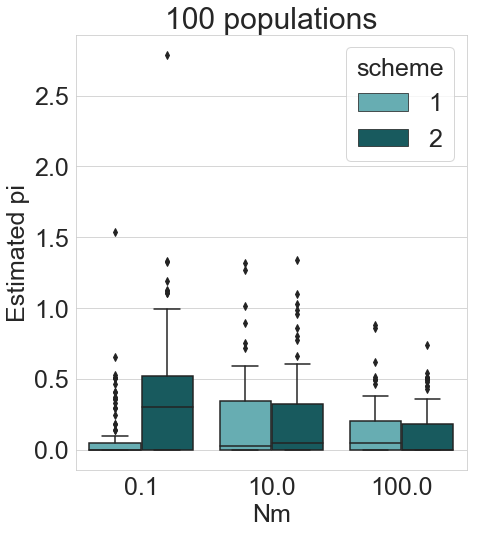

In [10]:
fig, ax = plt.subplots(figsize=(7, 8))
ax = sns.boxplot(x="Nm", y="pi", data=df.loc[df['datasets']==100,:], hue="scheme", 
                 palette=['#5ab8bf', '#0d6569'],
                 whis=0.95)
ax.set_title("100 populations")
ax.set_xlabel("Nm")
ax.set_ylabel("Estimated pi")

#plt.ylim(0,8)
#plt.yticks(np.arange(0,17,8))

#plt.savefig("datasets_1.svg", bbox_inches='tight')

plt.show()

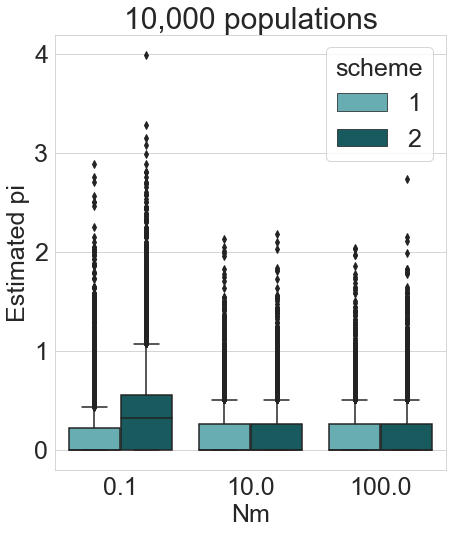

In [11]:
fig, ax = plt.subplots(figsize=(7, 8))
ax = sns.boxplot(x="Nm", y="pi", data=df.loc[df['datasets']==10000,:], hue="scheme", 
                 palette=['#5ab8bf', '#0d6569'],
                 whis=0.95)
ax.set_title("10,000 populations")
ax.set_xlabel("Nm")
ax.set_ylabel("Estimated pi")

#plt.ylim(0,8)
#plt.yticks(np.arange(0,17,8))

#plt.savefig("datasets_1.svg", bbox_inches='tight')

plt.show()